In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.feature
%matplotlib inline

In [2]:
def get_input_img(name):
    labeled_img = cv2.imread('D:/ML work/NOAA Sea Lion count/Data/Semantics Segmentation/' + name + '-processed.tif')
    original_img = cv2.imread('D:/ML work/NOAA Sea Lion count/Data/Train/' + name + '.jpg')
    
    return original_img, labeled_img


In [3]:
def process_img(name):
    labeled_img = cv2.imread('D:/ML work/NOAA Sea Lion count/Data/Semantics Segmentation/' + name + '.tif')
    original_img = cv2.imread('D:/ML work/NOAA Sea Lion count/Data/Train/' + name + '.jpg')
    dotted_img = cv2.imread('D:/ML work/NOAA Sea Lion count/Data/TrainDotted/' + name + '.jpg')
    
    diff_img = cv2.absdiff(labeled_img, original_img)
    
    mask_1 = cv2.cvtColor(diff_img, cv2.COLOR_BGR2GRAY)

    mask_1[mask_1 < 20] = 0
    mask_1[mask_1 > 0] = 255

    #this image_4 contains only labels in the image
    image_4 = cv2.bitwise_or(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB), cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB), mask = mask_1)

    redR, redG, redB = 255, 0, 0 #red should be preserved
    brownR, brownG, brownB = 255, 255, 0 ##brown should be preserved
    magentaR, magentaG, magentaB = 255, 0, 255 #magenta should be preserved
    greenR, greenG, greenB = 0, 255, 0 #green should be preserved
    blueR, blueG, blueB = 0, 5, 185 #blue should be preserved

    # Remove any outliers appeared probably due to jpeg compression loss
    red, green, blue = image_4[:, :, 0], image_4[:, :, 1], image_4[:, :, 2]
    mask = ((red != redR) & (green != redG) & (blue != redB)) & ((red != brownR) & (green != brownG) & (blue != brownB)) & ((red != magentaR) & (green != magentaG) & (blue != magentaB)) & ((red != greenR) & (green != greenG) & (blue != greenB)) & ((red != blueR) & (green != blueG) & (blue != blueB))

    image_4[:, :, :3][mask] = [0, 0, 0]

#     fig = plt.figure(figsize = (30, 30))
#     # fig.add_subplot(1,2,1)
#     # plt.imshow(mask_1)

#     # fig.add_subplot(1,2,2)
#     plt.imshow(image_4)

    cv2.imwrite('D:/ML work/NOAA Sea Lion count/Data/Semantics Segmentation/' + name + '-processed.tif', cv2.cvtColor(image_4, cv2.COLOR_BGR2RGB))

In [ ]:
#The images used for semantic segmentation training
training_imgs = ["0", "1", "4", "5", "6", "8", "10", "11", "12", "13"]

for img in training_imgs:
    process_img(img)

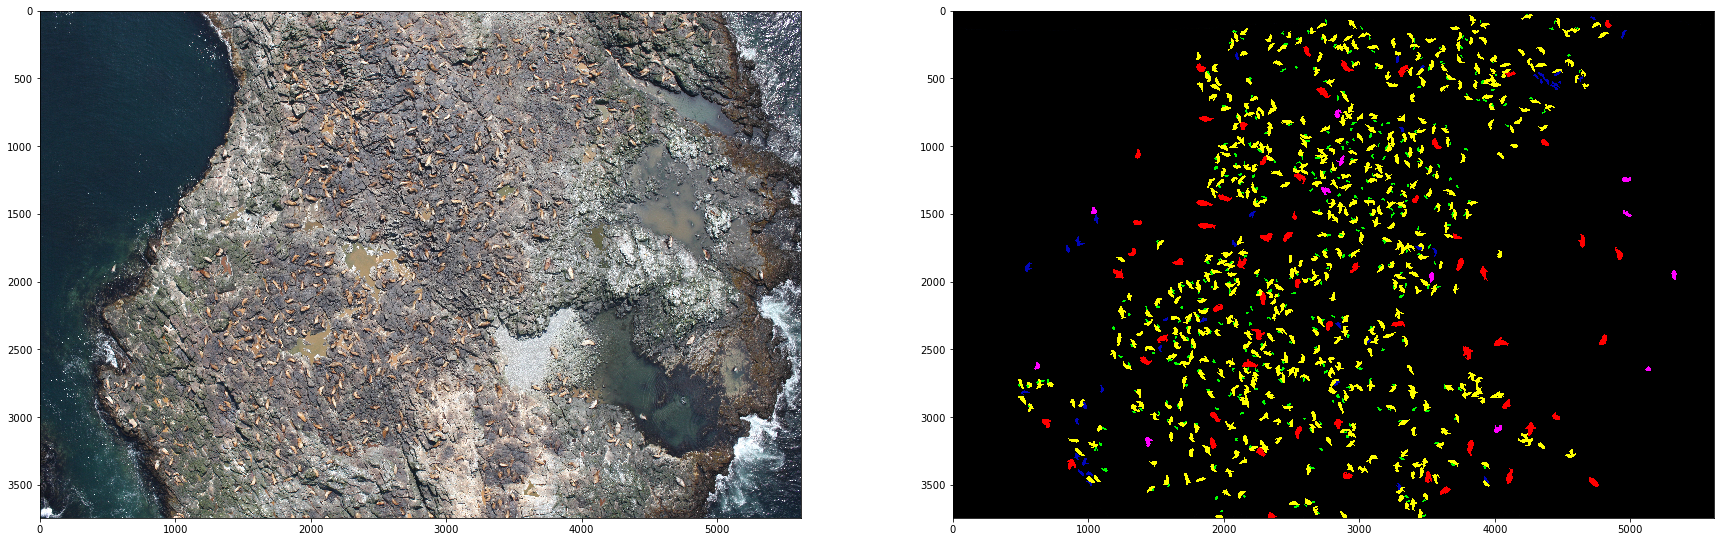

In [4]:
original_img, labeled_img = get_input_img('0')

original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (30, 30))
fig.add_subplot(1,2,1)
plt.imshow(original_img)

fig.add_subplot(1, 2, 2)
plt.imshow(labeled_img)